In [1]:
# https://www.yutaka-note.com/entry/matplotlib_inline
%matplotlib inline

In [2]:
import collections
from collections import Counter
import pycircos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import csv
from Bio import SeqIO 
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

In [3]:
# define the UP or DOWN regulated genes
direction = "down"

# define the input file
HUMAN_CHROMOSOME = "../data/chromosome/chromosome_human.tsv"
RICE_CHROMOSOME  = "../data/chromosome/chromosome_rice.tsv"
#HN-score
HUMAN_SCORE = "../data/human/human_position_down.tsv"
RICE_SCORE  = "../data/rice_position_down.tsv"
# GOslim
HUMAN_GOSLIM = "../data/human/biomart_human_goslim_R110.tsv" # release 110
RICE_GOSLIM = "../data/biomart_rice_goslim_R56.tsv" # release 56


# define the output file
COMBINED_CHROMOSOME = "../data/chromosome/HR_combined.tsv"
COMBINED_SCORE = f"../data/HR_combined_score_{direction}.tsv"
HUMAN_NO_ANNOTATION = f"../data/human/human_goslim_noannotation_{direction}.tsv"
HUMAN_EXTRACT_GOSLIM_GENE = f"../data/human/human_goslim_{direction}.tsv"
RICE_NO_ANNOTATION = f"../data/rice_goslim_noannotation_{direction}.tsv"
RICE_EXTRACT_GOSLIM_GENE = f"../data/rice_goslim_{direction}.tsv"

COMBINED_GOSLIM = f"../data/merged_goslim_{direction}.tsv"
COMBINED_GOSLIM_SORTED = f"../data/merged_goslim_sorted_{direction}.tsv"

In [4]:
#organism = "human"
df = pd.read_csv(HUMAN_CHROMOSOME, sep='\t')
df_subset = df[['chr', 'start', 'end']].copy()
df_subset['chr'] = 'H_' + df_subset['chr'].astype(str)
df_subset['organism'] = 'human'# assign the tag


# organism = "rice"
df1 = pd.read_csv(RICE_CHROMOSOME, sep='\t')
df1_subset = df1[['chr', 'start', 'end']].copy()
df1_subset['chr'] = 'R_' + df1_subset['chr'].astype(str)    
df1_subset['organism'] = 'rice'# assign the tag

combined_df = pd.concat([df_subset, df1_subset])
combined_df.reset_index(drop=True, inplace=True)
combined_df.to_csv(COMBINED_CHROMOSOME, sep='\t', index=False)
combined_df

chr  start        end organism
0    H_1      1  248956422    human
1    H_2      1  242193529    human
2    H_3      1  198295559    human
3    H_4      1  190214555    human
4    H_5      1  181538259    human
5    H_6      1  170805979    human
6    H_7      1  159345973    human
7    H_8      1  145138636    human
8    H_9      1  138394717    human
9   H_10      1  133797422    human
10  H_11      1  135086622    human
11  H_12      1  133275309    human
12  H_13      1  114364328    human
13  H_14      1  107043718    human
14  H_15      1  101991189    human
15  H_16      1   90338345    human
16  H_17      1   83257441    human
17  H_18      1   80373285    human
18  H_19      1   58617616    human
19  H_20      1   64444167    human
20  H_21      1   46709983    human
21  H_22      1   50818468    human
22   H_X      1  156040895    human
23   H_Y      1   57227415    human
24   R_1      1   43270923     rice
25   R_2      1   35937250     rice
26   R_3      1   36413819     rice
27   R_4      1   35502694     rice
28   R_5      1   29958434     rice
29   R_6      1   31248787     rice
30   R_7      1   29697621     rice
31   R_8      1   28443022     rice
32   R_9      1   23012720     rice
33  R_10      1   23207287     rice
34  R_11      1   29021106     rice
35  R_12      1   27531856     rice
36  R_Mt      1     490520     rice
37  R_Pt      1     134525     rice
38  R_B1      1       2135     rice

In [5]:
# Initialize
circle = Gcircle(figsize=(12,12))

# Set Chromosome Data
n = 935
m = 985

# Read the combined DataFrame
for index, row in combined_df.iterrows():
    name = row['chr']
    length = row['end']
    organism = row['organism']
    
    # get the chromosome number
    chrom_number_str = name.split('_')[1] # "H_1" -> "1"
    
    try:
        chrom_number = int(chrom_number_str)
        if organism == 'human':
            color = plt.cm.Blues(chrom_number / 24)  # change the color dynamically based on 22+X+Y
        else:
            color = plt.cm.Greens(chrom_number / 14)  # change the color dynamically based on 12+X+Y
    except ValueError:  # if chrom_number is not a number
        if chrom_number_str == "X":
            color = plt.cm.Blues(23 / 24)
        elif chrom_number_str == "Y":
            color = plt.cm.Blues(24 / 24)
        elif chrom_number_str == "Mt":
            color = plt.cm.Greens(13 / 14)
        elif chrom_number_str == "Pt":
            color = plt.cm.Greens(14 / 14)
        else:
            color = 'grey'
    
    arc = Garc(arc_id=name, 
               size=length, 
               interspace=0.5, 
               raxis_range=(n, m), 
               labelposition=int(30 + (m-n)/2),
               labelsize=7,
               label_visible=True,
               facecolor=color)
    circle.add_garc(arc)

<Figure size 1200x1200 with 0 Axes>

In [6]:
circle.set_garcs(0,360)

In [7]:
for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, 
                    raxis_range=(985,1000), 
                    tickinterval=20000000, 
                    ticklabels=None) 

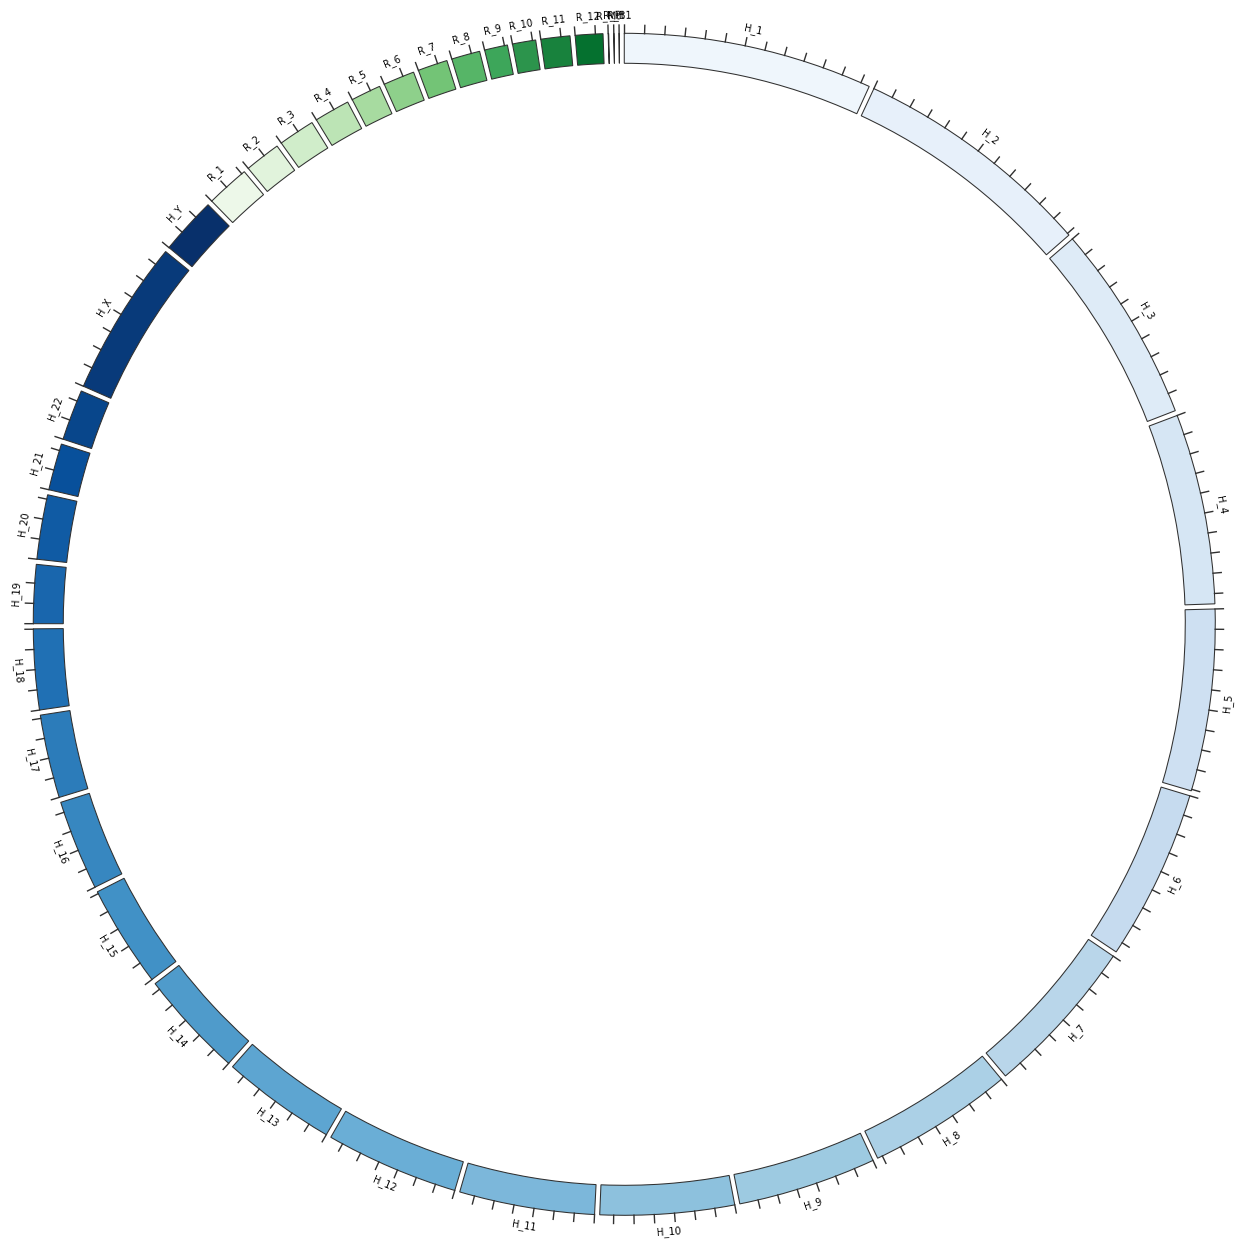

In [8]:
circle.figure

#### Scatter plot of human vs rice upregulated genes

In [10]:
#organism = "human"
df_h_score = pd.read_csv(HUMAN_SCORE, sep='\t')
df_h_score_subset = df_h_score[['Gene stable ID',
                        'Chromosome/scaffold name', 
                        'Gene start (bp)',
                        'Gene end (bp)',
                        'HN-score(HN5)']].copy()
df_h_score_subset['Chromosome/scaffold name'] = 'H_' + df_h_score_subset['Chromosome/scaffold name'].astype(str)
df_h_score_subset['organism'] = 'human'# assign the tag


# organism = "rice"
df_r_score = pd.read_csv(RICE_SCORE, sep='\t')
df_r_score_subset = df_r_score[['Gene stable ID',
                        'Chromosome/scaffold name', 
                        'Gene start (bp)',
                        'Gene end (bp)',
                        'HN-score(HN5)']].copy()
df_r_score_subset['Chromosome/scaffold name'] = 'R_' + df_r_score_subset['Chromosome/scaffold name'].astype(str)
df_r_score_subset['organism'] = 'rice'# assign the tag


# combined human and rice DataFrame
combined_df_score = pd.concat([df_h_score_subset, df_r_score_subset])
combined_df_score.reset_index(drop=True, inplace=True)
combined_df_score.to_csv(COMBINED_SCORE, sep='\t', index=False)
combined_df_score

Gene stable ID Chromosome/scaffold name  Gene start (bp)  Gene end (bp)  \
0    ENSG00000174015                     H_13         45702320       45714559   
1    ENSG00000101463                     H_20         24469629       24666616   
2    ENSG00000241945                     H_21         44107373       44131181   
3    ENSG00000101452                     H_20         38962299       39039723   
4    ENSG00000132825                     H_20         59936663       59940305   
..               ...                      ...              ...            ...   
570     Os01g0216000                      R_1          6340836        6344286   
571     Os04g0453200                      R_4         22611924       22620016   
572     Os09g0424300                      R_9         15385723       15389096   
573     Os09g0472700                      R_9         18058240       18058985   
574     Os07g0687400                      R_7         29206934       29207571   

     HN-score(HN5) organism  
0            -16.0    human  
1            -14.0    human  
2            -26.0    human  
3            -21.0    human  
4            -16.0    human  
..             ...      ...  
570          -70.0     rice  
571          -45.0     rice  
572          -95.0     rice  
573          -64.0     rice  
574          -51.0     rice  

[575 rows x 6 columns]

In [12]:
# Initialize
arcdata_dict = collections.defaultdict(dict)

for index, row in combined_df_score.iterrows():
    name = row['Chromosome/scaffold name']
    start = row['Gene start (bp)']
    end = row['Gene end (bp)']
    mid = (start + end) // 2
    value = row['HN-score(HN5)']

    if name not in arcdata_dict: # if the key is not in the dictionary, add it
        arcdata_dict[name]["positions"] = []
        arcdata_dict[name]["values"] = []

    arcdata_dict[name]["positions"].append(mid)
    arcdata_dict[name]["values"].append(value)


# plot
vmin, vmax = combined_df_score['HN-score(HN5)'].min(), combined_df_score['HN-score(HN5)'].max()
for key in arcdata_dict:
    circle.scatterplot(
        key,
        data=arcdata_dict[key]["values"],
        positions=arcdata_dict[key]["positions"], 
        rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
        raxis_range=(840, 940),
        facecolor="blue",
        edgecolor="black",
        spine=True
    )

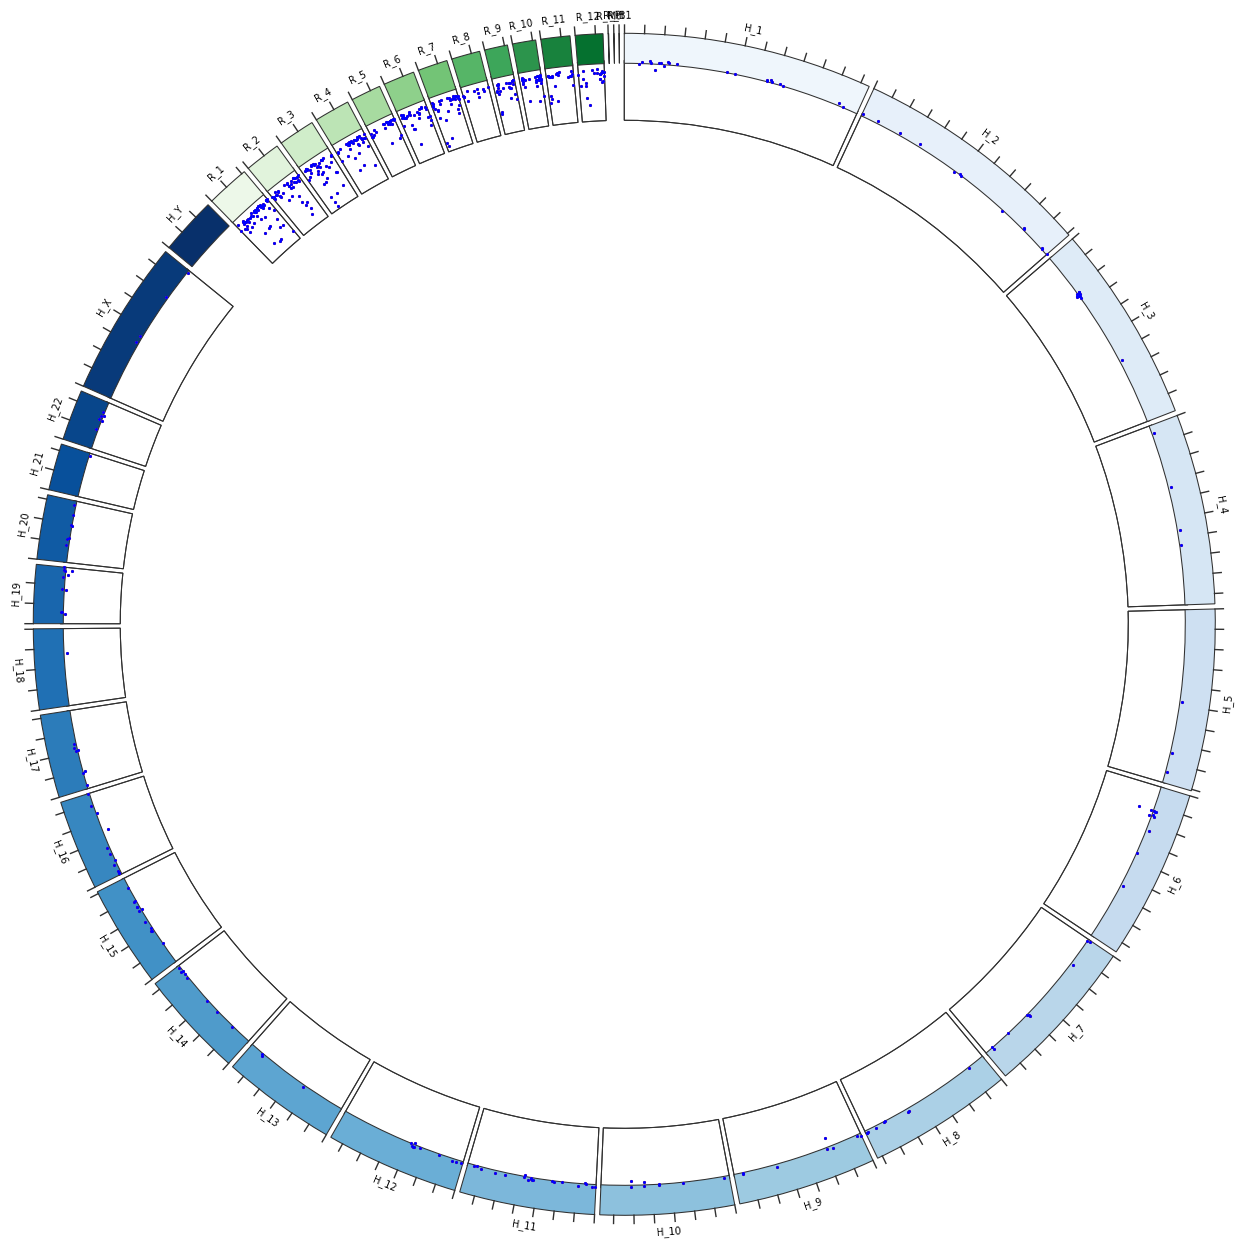

In [13]:
circle.figure

#### linkplot of GOslim terms for human vs rice upregulated genes

##### human

In [14]:
# Prepare the extract up genes data from GOslim file

# organism = "human"
# Using df_h_score_subset for extract up genes data from GOslim file
df_h_goslim = pd.read_csv(HUMAN_GOSLIM, sep='\t')
df_h_goslim['Chromosome/scaffold name'] = 'H_' + df_h_goslim['Chromosome/scaffold name'].astype(str)


extract_df_h_goslim = pd.merge(
    df_h_score_subset, df_h_goslim,
    left_on=['Gene stable ID', 'Chromosome/scaffold name'],
    right_on=['Gene stable ID', 'Chromosome/scaffold name'],
    how='inner'
)

# Extract genes with no annotations
extract_df_h_goslim_with_indicator = pd.merge(
    df_h_score_subset, df_h_goslim,
    left_on=['Gene stable ID', 'Chromosome/scaffold name'],
    right_on=['Gene stable ID', 'Chromosome/scaffold name'],
    how='left',
    indicator=True # add indicator column to show the difference
)

# extract_df_h_goslim_with_indicator
left_only_rows = extract_df_h_goslim_with_indicator[extract_df_h_goslim_with_indicator['_merge'] == 'left_only']

# left_only_rows
left_only_rows.to_csv(HUMAN_NO_ANNOTATION, sep='\t', index=False)
extract_df_h_goslim.to_csv(HUMAN_EXTRACT_GOSLIM_GENE, sep='\t', index=False)
extract_df_h_goslim


/tmp/ipykernel_32834/3480807121.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_h_goslim = pd.read_csv(HUMAN_GOSLIM, sep='\t')


Gene stable ID Chromosome/scaffold name  Gene start (bp)  \
0     ENSG00000174015                     H_13         45702320   
1     ENSG00000174015                     H_13         45702320   
2     ENSG00000174015                     H_13         45702320   
3     ENSG00000174015                     H_13         45702320   
4     ENSG00000174015                     H_13         45702320   
...               ...                      ...              ...   
3584  ENSG00000215695                      H_1         15659713   
3585  ENSG00000215695                      H_1         15659713   
3586  ENSG00000215695                      H_1         15659713   
3587  ENSG00000215695                      H_1         15659713   
3588  ENSG00000215695                      H_1         15659713   

      Gene end (bp)  HN-score(HN5) organism  start2 (bp)  end2 (bp)  \
0          45714559            -16    human     45702320   45714559   
1          45714559            -16    human     45702320   45714559   
2          45714559            -16    human     45702320   45714559   
3          45714559            -16    human     45702320   45714559   
4          45714559            -16    human     45702320   45714559   
...             ...            ...      ...          ...        ...   
3584       15662033            -26    human     15659713   15662033   
3585       15662033            -26    human     15659713   15662033   
3586       15662033            -26    human     15659713   15662033   
3587       15662033            -26    human     15659713   15662033   
3588       15662033            -26    human     15659713   15662033   

     GOSlim GOA Accession(s)                   GOSlim GOA Description  
0                 GO:0031410                      cytoplasmic vesicle  
1                 GO:0043226                                organelle  
2                 GO:0031410                      cytoplasmic vesicle  
3                 GO:0043226                                organelle  
4                 GO:0031410                      cytoplasmic vesicle  
...                      ...                                      ...  
3584              GO:0005886                          plasma membrane  
3585              GO:0055085                  transmembrane transport  
3586              GO:0072659  protein localization to plasma membrane  
3587              GO:0098772    molecular function regulator activity  
3588              GO:0016192               vesicle-mediated transport  

[3589 rows x 10 columns]

##### rice

In [15]:
# organism = "rice"
# Using df_r_score_subset for extract up genes data from GOslim file

df_r_goslim = pd.read_csv(RICE_GOSLIM, sep='\t')
df_r_goslim['Chromosome/scaffold name'] = 'R_' + df_r_goslim['Chromosome/scaffold name'].astype(str)

extract_df_r_goslim = pd.merge(
    df_r_score_subset, df_r_goslim,
    left_on=['Gene stable ID', 'Chromosome/scaffold name'],
    right_on=['Gene stable ID', 'Chromosome/scaffold name'],
    how='inner'
)

# Extract genes with no annotations
extract_df_r_goslim_with_indicator = pd.merge(
    df_r_score_subset, df_r_goslim,
    left_on=['Gene stable ID', 'Chromosome/scaffold name'],
    right_on=['Gene stable ID', 'Chromosome/scaffold name'],
    how='left',
    indicator=True # add indicator column to show the difference
)

# extract_df_r_goslim_with_indicator
left_only_rows = extract_df_r_goslim_with_indicator[extract_df_r_goslim_with_indicator['_merge'] == 'left_only']

# left_only_rows
left_only_rows.to_csv(RICE_NO_ANNOTATION, sep='\t', index=False)
extract_df_r_goslim.to_csv(RICE_EXTRACT_GOSLIM_GENE, sep='\t', index=False)
extract_df_r_goslim

/tmp/ipykernel_32834/1793619523.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_r_goslim = pd.read_csv(RICE_GOSLIM, sep='\t')


Gene stable ID Chromosome/scaffold name  Gene start (bp)  Gene end (bp)  \
0      Os10g0555700                     R_10         21835933       21837651   
1      Os10g0555700                     R_10         21835933       21837651   
2      Os10g0555700                     R_10         21835933       21837651   
3      Os10g0555700                     R_10         21835933       21837651   
4      Os10g0555700                     R_10         21835933       21837651   
...             ...                      ...              ...            ...   
2240   Os07g0687400                      R_7         29206934       29207571   
2241   Os07g0687400                      R_7         29206934       29207571   
2242   Os07g0687400                      R_7         29206934       29207571   
2243   Os07g0687400                      R_7         29206934       29207571   
2244   Os07g0687400                      R_7         29206934       29207571   

      HN-score(HN5) organism  start1 (bp)  end1 (bp) GOSlim GOA Accession(s)  \
0             -42.0     rice     21835933   21837651              GO:0005575   
1             -42.0     rice     21835933   21837651              GO:0005576   
2             -42.0     rice     21835933   21837651              GO:0008150   
3             -42.0     rice     21835933   21837651              GO:0000003   
4             -42.0     rice     21835933   21837651              GO:0016020   
...             ...      ...          ...        ...                     ...   
2240          -51.0     rice     29206934   29207571              GO:0009987   
2241          -51.0     rice     29206934   29207571              GO:0008152   
2242          -51.0     rice     29206934   29207571              GO:0009058   
2243          -51.0     rice     29206934   29207571              GO:0006139   
2244          -51.0     rice     29206934   29207571              GO:0065009   

                                GOSlim GOA Description  
0                                   cellular_component  
1                                 extracellular region  
2                                   biological_process  
3                                         reproduction  
4                                             membrane  
...                                                ...  
2240                                  cellular process  
2241                                 metabolic process  
2242                              biosynthetic process  
2243  nucleobase-containing compound metabolic process  
2244                  regulation of molecular function  

[2245 rows x 10 columns]

##### __Merge human and rice GOslim terms__

In [16]:
# merge dataframe based on common column 'GOSlim GOA Accession(s)'
merged_df_goslim = pd.merge(
    extract_df_r_goslim, 
    extract_df_h_goslim,
    left_on=['GOSlim GOA Accession(s)'],
    right_on=['GOSlim GOA Accession(s)'],
    how='inner',
    suffixes=('_rice', '_human')
)

# extract necessary columns

merged_df_goslim = merged_df_goslim[['GOSlim GOA Accession(s)',
                                     'GOSlim GOA Description_rice',
                                     'GOSlim GOA Description_human',
                                     'Gene stable ID_rice',
                                     'Gene stable ID_human',
                                     'Chromosome/scaffold name_rice',
                                     'start1 (bp)',
                                     'end1 (bp)',
                                     'Chromosome/scaffold name_human',
                                     'start2 (bp)',
                                     'end2 (bp)',
                                     'HN-score(HN5)_rice',
                                     'HN-score(HN5)_human']]

# Remove duplicate rows based on specific columns
merged_df_goslim.drop_duplicates(inplace=True)

# for debugging purpose
unique_accessions_r = set(extract_df_r_goslim['GOSlim GOA Accession(s)'].unique())
unique_accessions_h = set(extract_df_h_goslim['GOSlim GOA Accession(s)'].unique())
common_accessions = unique_accessions_r.intersection(unique_accessions_h)
unique_accessions_merged = set(merged_df_goslim['GOSlim GOA Accession(s)'].unique())
missing_accessions = common_accessions.difference(unique_accessions_merged)
print(f"Number of common accessions: {len(common_accessions)}")
print(f"Number of missing accessions: {len(missing_accessions)}")
print(f"Missing accessions: {missing_accessions}")

merged_df_goslim.to_csv(COMBINED_GOSLIM, sep='\t', index=False)
merged_df_goslim

Number of common accessions: 26
Number of missing accessions: 0
Missing accessions: set()


GOSlim GOA Accession(s) GOSlim GOA Description_rice  \
0                  GO:0005576        extracellular region   
2                  GO:0005576        extracellular region   
5                  GO:0005576        extracellular region   
7                  GO:0005576        extracellular region   
8                  GO:0005576        extracellular region   
...                       ...                         ...   
46628              GO:0005794             Golgi apparatus   
46635              GO:0005794             Golgi apparatus   
46638              GO:0005794             Golgi apparatus   
46640              GO:0005794             Golgi apparatus   
46642              GO:0005794             Golgi apparatus   

      GOSlim GOA Description_human Gene stable ID_rice Gene stable ID_human  \
0             extracellular region        Os10g0555700      ENSG00000128342   
2             extracellular region        Os10g0555700      ENSG00000134864   
5             extracellular region        Os10g0555700      ENSG00000153292   
7             extracellular region        Os10g0555700      ENSG00000179431   
8             extracellular region        Os10g0555700      ENSG00000167653   
...                            ...                 ...                  ...   
46628              Golgi apparatus        Os01g0265100      ENSG00000134259   
46635              Golgi apparatus        Os01g0265100      ENSG00000111186   
46638              Golgi apparatus        Os01g0265100      ENSG00000160678   
46640              Golgi apparatus        Os01g0265100      ENSG00000169174   
46642              Golgi apparatus        Os01g0265100      ENSG00000215695   

      Chromosome/scaffold name_rice  start1 (bp)  end1 (bp)  \
0                              R_10     21835933   21837651   
2                              R_10     21835933   21837651   
5                              R_10     21835933   21837651   
7                              R_10     21835933   21837651   
8                              R_10     21835933   21837651   
...                             ...          ...        ...   
46628                           R_1      9019849    9024048   
46635                           R_1      9019849    9024048   
46638                           R_1      9019849    9024048   
46640                           R_1      9019849    9024048   
46642                           R_1      9019849    9024048   

      Chromosome/scaffold name_human  start2 (bp)  end2 (bp)  \
0                               H_22     30240453   30246759   
2                               H_13    100530164  100589528   
5                                H_6     46997708   47042350   
7                               H_11     35618460   35620865   
8                                H_8    142670308  142682725   
...                              ...          ...        ...   
46628                            H_1    115285904  115338770   
46635                           H_12      1529891    1647212   
46638                            H_1    153627926  153632039   
46640                            H_1     55039447   55064852   
46642                            H_1     15659713   15662033   

       HN-score(HN5)_rice  HN-score(HN5)_human  
0                   -42.0                  -24  
2                   -42.0                  -19  
5                   -42.0                  -15  
7                   -42.0                  -23  
8                   -42.0                  -17  
...                   ...                  ...  
46628               -41.0                  -22  
46635               -41.0                  -17  
46638               -41.0                  -15  
46640               -41.0                  -17  
46642               -41.0                  -26  

[17349 rows x 13 columns]

In [17]:
#Count the occurrences of each 'GOSlim GOA Accession(s)'
accession_counter = Counter(merged_df_goslim['GOSlim GOA Accession(s)'])

#Sort the DataFrame based on the counts
merged_df_goslim['count'] = merged_df_goslim['GOSlim GOA Accession(s)'].map(accession_counter)
merged_df_goslim_sorted = merged_df_goslim.sort_values('count', ascending=False).drop('count', axis=1)

merged_df_goslim_sorted.to_csv(COMBINED_GOSLIM_SORTED, sep='\t', index=False)
merged_df_goslim_sorted


GOSlim GOA Accession(s)                     GOSlim GOA Description_rice  \
24442              GO:0003824                              catalytic activity   
16722              GO:0003824                              catalytic activity   
16704              GO:0003824                              catalytic activity   
16707              GO:0003824                              catalytic activity   
16708              GO:0003824                              catalytic activity   
...                       ...                                             ...   
2400               GO:0030312                external encapsulating structure   
46312              GO:0006091  generation of precursor metabolites and energy   
46554              GO:0005635                                nuclear envelope   
46553              GO:0005635                                nuclear envelope   
46550              GO:0005635                                nuclear envelope   

                         GOSlim GOA Description_human Gene stable ID_rice  \
24442                              catalytic activity        Os06g0193200   
16722                              catalytic activity        Os02g0706900   
16704                              catalytic activity        Os02g0706900   
16707                              catalytic activity        Os02g0706900   
16708                              catalytic activity        Os02g0706900   
...                                               ...                 ...   
2400                 external encapsulating structure        Os10g0555700   
46312  generation of precursor metabolites and energy        Os06g0721800   
46554                                nuclear envelope        Os12g0236100   
46553                                nuclear envelope        Os12g0236100   
46550                                nuclear envelope        Os12g0236100   

      Gene stable ID_human Chromosome/scaffold name_rice  start1 (bp)  \
24442      ENSG00000223658                           R_6      4700512   
16722      ENSG00000166855                           R_2     29224218   
16704      ENSG00000166507                           R_2     29224218   
16707      ENSG00000182810                           R_2     29224218   
16708      ENSG00000168398                           R_2     29224218   
...                    ...                           ...          ...   
2400       ENSG00000111186                          R_10     21835933   
46312      ENSG00000153292                           R_6     30658369   
46554      ENSG00000213689                          R_12      7441389   
46553      ENSG00000205808                          R_12      7441389   
46550      ENSG00000151353                          R_12      7441389   

       end1 (bp) Chromosome/scaffold name_human  start2 (bp)  end2 (bp)  \
24442    4703042                            H_2     43675151   43676429   
16722   29226240                           H_15     65148219   65185342   
16704   29226240                           H_10     73801911   73811798   
16707   29226240                           H_16     68020916   68023232   
16708   29226240                           H_14     96204679   96244166   
...          ...                            ...          ...        ...   
2400    21837651                           H_12      1529891    1647212   
46312   30659202                            H_6     46997708   47042350   
46554    7446142                            H_3     48465811   48467645   
46553    7446142                            H_9      4662294    4665258   
46550    7446142                            H_2       663877     677406   

       HN-score(HN5)_rice  HN-score(HN5)_human  
24442               -45.0                  -16  
16722               -40.0                  -15  
16704               -40.0                  -19  
16707               -40.0                  -25  
16708               -40.0                  -20  
...                   ...           

In [18]:
# Add color data to 'GOSlim GOA Description' column
unique_ontologies = merged_df_goslim_sorted['GOSlim GOA Description_rice'].unique()

n = len(unique_ontologies)
colors = cm.rainbow(np.linspace(0, 1, n)) # create n colors by cm.rainbow

# create ontology_color_dict
ontology_color_dict = {term: color for term, color in zip(unique_ontologies, colors)}

# add to garc_dict
for term, color in ontology_color_dict.items():
    circle._garc_dict[term] = {'facecolor': color, 'edgecolor': color}

In [19]:
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)

# Count the number of ontology terms
ontology_count = Counter()
with open(COMBINED_GOSLIM_SORTED, mode='r', newline='') as f:
    reader = csv.DictReader(f, delimiter='\t')
    for row in reader:
        ontology = row['GOSlim GOA Description_rice']
        ontology_count[ontology] += 1

min_linewidth = 1 * 10**-40
max_linewidth = 0.002

min_count = min(ontology_count.values())
max_count = max(ontology_count.values())


with open(COMBINED_GOSLIM_SORTED, mode='r', newline='') as f:
    reader = csv.DictReader(f, delimiter='\t')
    for row in reader:
        name1 = row['Chromosome/scaffold name_rice'] # rice
        start1 = int(row['start1 (bp)'])
        end1 = int(row['end1 (bp)'])
        name2 = row['Chromosome/scaffold name_human'] # human
        start2 = int(row['start2 (bp)'])
        end2 = int(row['end2 (bp)'])
        ontology = row['GOSlim GOA Description_rice']

        # For debugging
        print("Debugging Info:")
        print(f"ontology: {ontology}")
        print(f"circle._garc_dict[ontology]: {circle._garc_dict.get(ontology, 'Not found')}")

        count = ontology_count[ontology]
        linewidth = min_linewidth + (max_linewidth - min_linewidth) * ((count - min_count) / (max_count - min_count))
        
        source = (name1, start1, end1, 840)
        destination = (name2, start2, end2, 840)
        circle.chord_plot(source, 
                          destination, 
                          facecolor=circle._garc_dict[ontology]['facecolor'],
                          linewidth=linewidth,
                          edgecolor=circle._garc_dict[ontology]['edgecolor']
                          )

Debugging Info:
ontology: catalytic activity
circle._garc_dict[ontology]: {'facecolor': array([0.5, 0. , 1. , 1. ]), 'edgecolor': array([0.5, 0. , 1. , 1. ])}
Debugging Info:
ontology: catalytic activity
circle._garc_dict[ontology]: {'facecolor': array([0.5, 0. , 1. , 1. ]), 'edgecolor': array([0.5, 0. , 1. , 1. ])}
Debugging Info:
ontology: catalytic activity
circle._garc_dict[ontology]: {'facecolor': array([0.5, 0. , 1. , 1. ]), 'edgecolor': array([0.5, 0. , 1. , 1. ])}
Debugging Info:
ontology: catalytic activity
circle._garc_dict[ontology]: {'facecolor': array([0.5, 0. , 1. , 1. ]), 'edgecolor': array([0.5, 0. , 1. , 1. ])}
Debugging Info:
ontology: catalytic activity
circle._garc_dict[ontology]: {'facecolor': array([0.5, 0. , 1. , 1. ]), 'edgecolor': array([0.5, 0. , 1. , 1. ])}
Debugging Info:
ontology: catalytic activity
circle._garc_dict[ontology]: {'facecolor': array([0.5, 0. , 1. , 1. ]), 'edgecolor': array([0.5, 0. , 1. , 1. ])}
Debugging Info:
ontology: catalytic activity
c

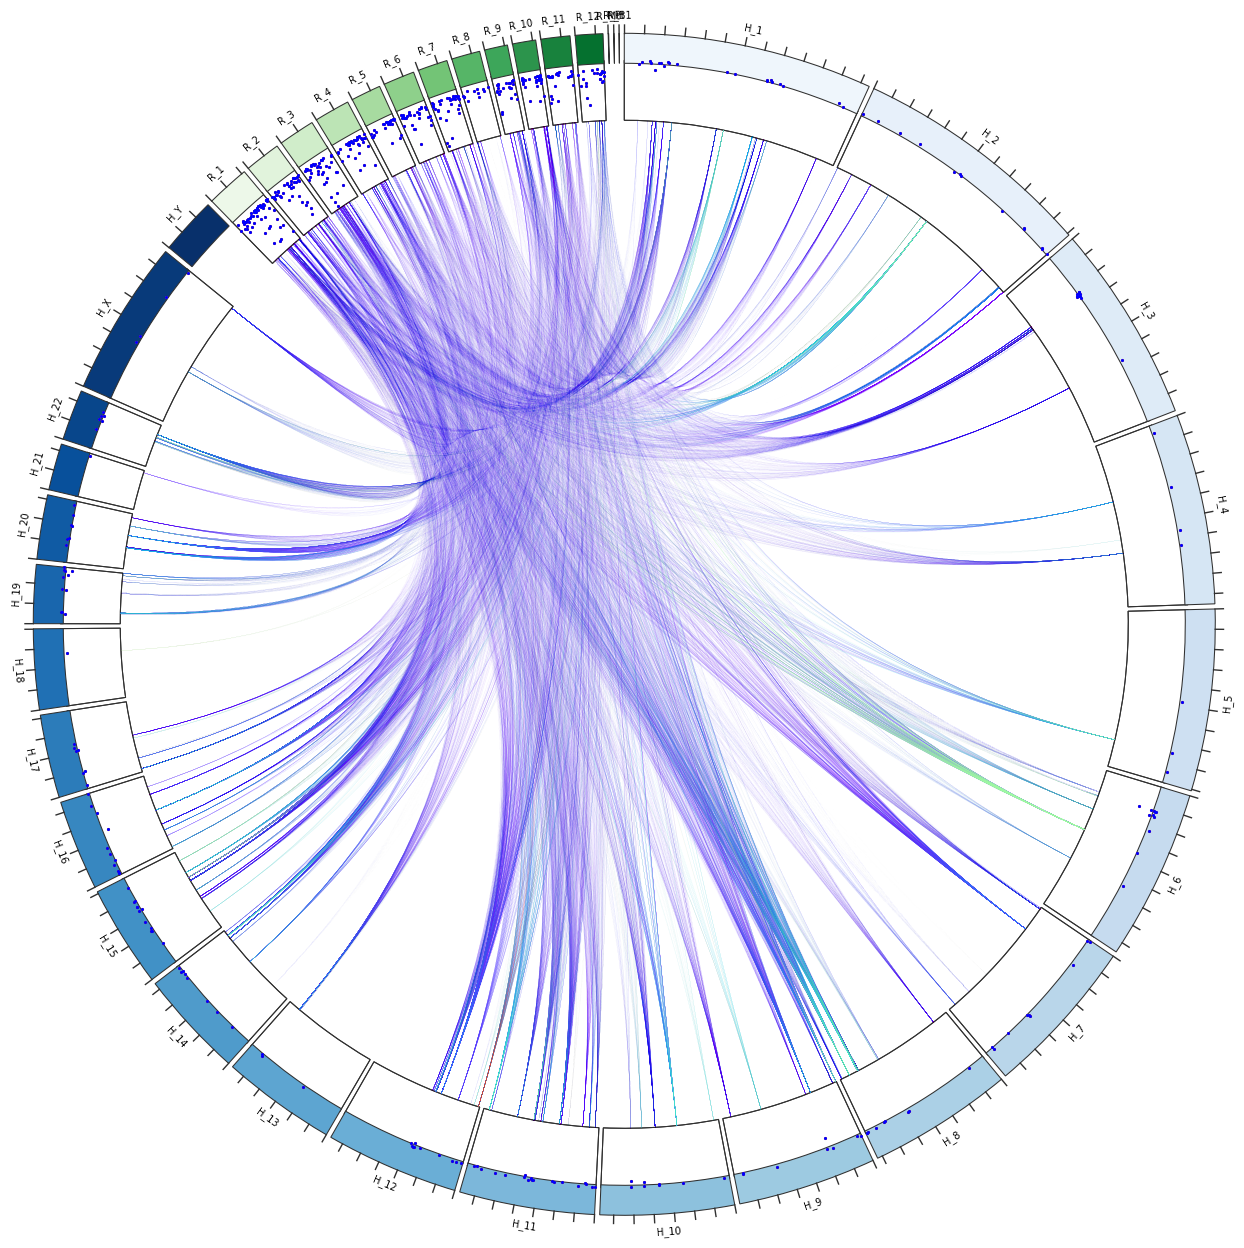

In [20]:
circle.figure

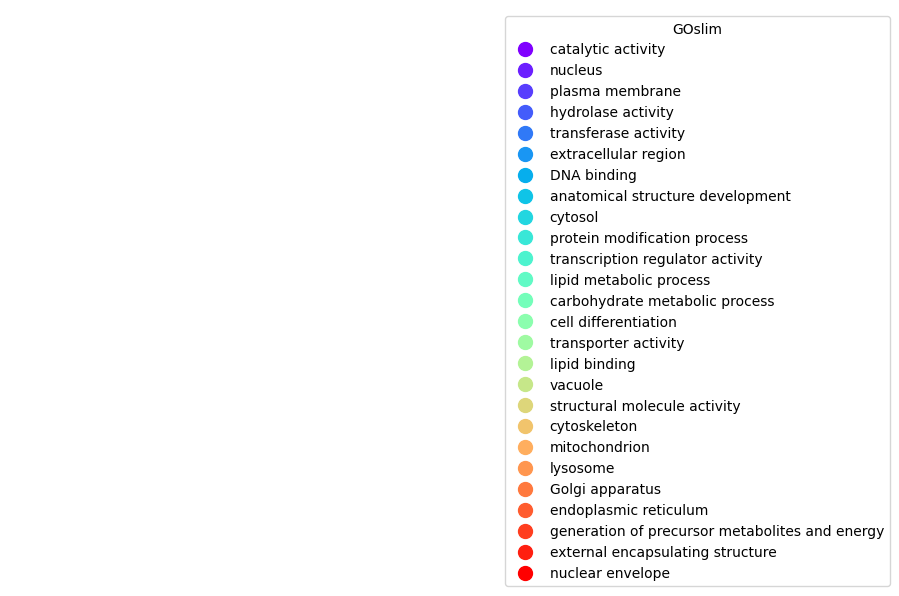

In [21]:
# add legend as a independent figure
fig, ax = plt.subplots(figsize=(6, 6))
for ontology, color in ontology_color_dict.items():
    ax.plot([], [], label=ontology, color=color, marker='o', markersize=10, linestyle='None')

ax.legend(title="GOslim", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.axis('off')
plt.show()
